In [1]:
from itertools import permutations
from typing import *
import ThermoPyle as TP
from ThermoPyle import *
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3

%matplotlib notebook
mpld3.enable_notebook()

In [2]:
%run ../scripts/der_CSV_gen.py --no-write

Iteration 0
    Generating Initial Fluid Object.
    Success!
    This Iteration: 0 hours, 0 minutes, 13.93 seconds
    Time Elapsed: 0 hours, 0 minutes, 13.93 seconds


Iteration 1 of 215:
    Calculating Column d(D)/d(H)|S
    Success!
    This Iteration: 0 hours, 0 minutes, 11.233 seconds
    Time Elapsed: 0 hours, 0 minutes, 25.163 seconds

Iteration 2 of 215:
    Calculating Column d(U)/d(T)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 11.245 seconds
    Time Elapsed: 0 hours, 0 minutes, 36.408 seconds

Iteration 3 of 215:
    Calculating Column d(S)/d(G)|H
    Success!
    This Iteration: 0 hours, 0 minutes, 10.592 seconds
    Time Elapsed: 0 hours, 0 minutes, 47.0 seconds

Iteration 4 of 215:
    Calculating Column d(U)/d(D)|S
    Success!
    This Iteration: 0 hours, 0 minutes, 11.012 seconds
    Time Elapsed: 0 hours, 0 minutes, 58.012 seconds

Iteration 5 of 215:
    Calculating Column d(P)/d(D)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 10.626 seconds
 

In [7]:
Water = myfluid.copy()

In [15]:
Water.clean()
Water.refresh()
print("\n".join(Water.vars))
assert "H" in Water.vars

T
P
U
d(G)/d(U)|S
d(U)/d(T)|P
d(D)/d(U)|S
d(S)/d(P)|T
d(P)/d(S)|H
d(D)/d(U)|P
d(P)/d(H)|S
d(T)/d(D)|G
D
d(T)/d(D)|H
d(D)/d(H)|T
d(S)/d(P)|D
d(U)/d(G)|T
d(T)/d(U)|S
d(P)/d(G)|H
d(S)/d(D)|H
d(H)/d(P)|D
d(D)/d(P)|G
d(U)/d(G)|H
d(D)/d(T)|H
d(T)/d(P)|U
d(H)/d(D)|G
d(P)/d(D)|H
d(H)/d(S)|U
d(U)/d(G)|D
d(G)/d(P)|D
d(G)/d(U)|P
d(S)/d(T)|D
d(S)/d(T)|P
d(T)/d(S)|H
d(T)/d(S)|D
d(H)/d(T)|P
d(G)/d(H)|T
d(P)/d(T)|S
d(U)/d(D)|G
H
d(D)/d(U)|T
d(S)/d(T)|U
d(G)/d(T)|S
d(U)/d(S)|H
S
d(P)/d(D)|U
d(P)/d(T)|G
d(H)/d(S)|G
d(H)/d(T)|G
d(U)/d(S)|G
d(G)/d(P)|H
d(P)/d(S)|T
d(U)/d(H)|D
d(S)/d(U)|P
d(U)/d(H)|T
d(T)/d(U)|D
d(P)/d(U)|G
d(G)/d(P)|T
d(D)/d(H)|U
d(D)/d(T)|U
d(G)/d(S)|D
d(P)/d(T)|U
d(D)/d(G)|T
d(S)/d(G)|H
d(D)/d(S)|P
d(T)/d(U)|G
d(G)/d(S)|T
d(S)/d(U)|H
d(S)/d(T)|H
d(H)/d(U)|S
d(T)/d(G)|D
d(G)/d(T)|P
d(H)/d(T)|U
d(U)/d(P)|D
d(H)/d(U)|T
d(U)/d(D)|S
d(T)/d(S)|U
G
d(U)/d(T)|D
d(U)/d(S)|T
d(T)/d(D)|S
PHASE
d(H)/d(D)|U
d(S)/d(G)|P
d(P)/d(G)|T
d(P)/d(D)|S
d(D)/d(P)|H
d(H)/d(G)|P
d(G)/d(U)|D
d(U)/d(H)|P
d(T)/d(P

<IPython.core.display.Javascript object>


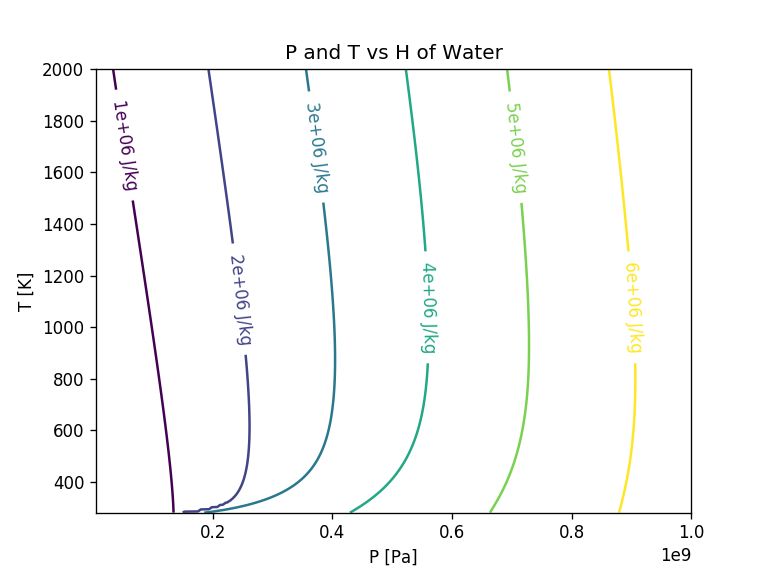

In [16]:
Water.xvar = "P"
Water.yvar = "T"
Water.zvar = "D"
#print("G" in Water.vars)
Water.refresh()
Water.clean()
TP.fluid_contour_plot(Water, "H")

<IPython.core.display.Javascript object>


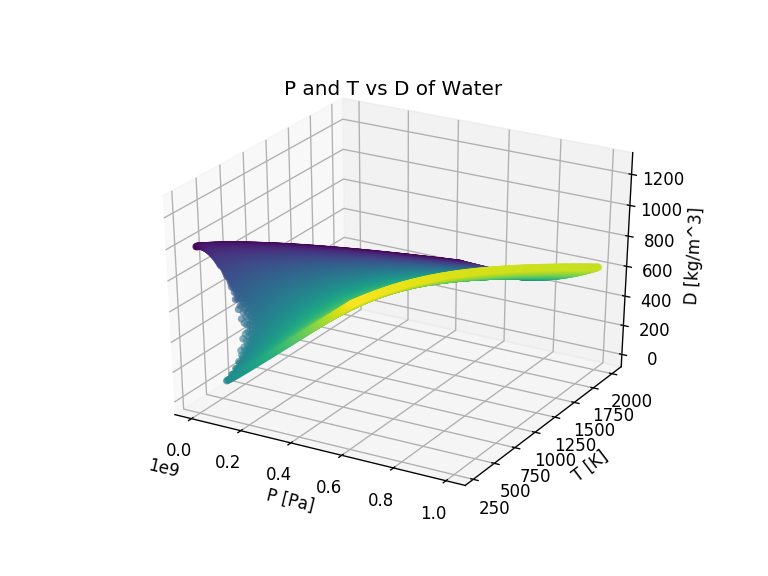

In [9]:
Water.xvar = "P"
Water.yvar = "T"
Water.zvar = "D"
Water.refresh()
Water.clean()
TP.fluid_plot(Water, xvar="P", yvar="T", zvar="D", coloring="U")

In [12]:
print(Water.write_data.__doc__)


        Does what it says on the tin. Makes a CSV and JSON files and saves them to path given.

        Parameters:

            path (str): path where file should be saved

            filename (str): what to name the file

            mode (str): How to name the file:
                -  **default**: ``FluidName_X-xpoints_Y-ypoints_Z``;
                -  **custom**: fully custom name;
                -  **dual**: default + custom.
        


In [14]:
Water.write_data(path="../finalData/", filename="with_ders_and_enthalpy", mode="dual")